# **EYE FOR BLIND**
This notebook will be used to prepare the capstone project 'Eye for Blind'

# **Problem Statement**

In this capstone project, you need to create a deep learning model which can explain the contents of an image in the form of speech through caption generation with an attention mechanism on Flickr8K dataset. This kind of model is a use-case for blind people so that they can understand any image with the help of speech. The caption generated through a CNN-RNN model will be converted to speech using a text to speech library.

This problem statement is an application of both deep learning and natural language processing. The features of an image will be extracted by a CNN-based encoder and this will be decoded by an RNN model.

The project is an extended application of Show, Attend and Tell: Neural Image Caption Generation with Visual Attention paper.

The dataset is taken from the Kaggle website and it consists of sentence-based image descriptions having a list of 8,000 images that are each paired with five different captions which provide clear descriptions of the salient entities and events of the image.

Let's first setup for image captioning project. It imports necessary libraries and sets up the environment. Let's go through it step by step:

1. **Library Installations:**
   - `!pip install wordcloud`: This command installs the "wordcloud" library, which can be used to create word clouds from text data.
   - `!pip install gTTs`: This command installs the "gTTS" (Google Text-to-Speech) library for text-to-speech conversion.
   - `!pip install playsound`: This command installs the "playsound" library, which can be used to play audio files.

2. **Importing Libraries:**
   - Various libraries are imported for data manipulation, visualization, machine learning, and text-to-speech conversion.

3. **Setting Display Options:**
   - `pd.set_option('display.max_colwidth', -1)`: This line sets the maximum column width for displaying data using pandas. It's often used when you want to see the complete captions in your DataFrame without truncation.

4. **Additional Imports:**
   - Some additional libraries are imported, including collections, WordCloud, and STOPWORDS from the wordcloud library.

5. **TensorFlow and Keras Imports:**
   - TensorFlow and Keras libraries are imported for deep learning tasks.
   - Import specific modules and functions required for building and training deep learning models.

6. **InceptionV3 Model Import:**
   - `from tensorflow.keras.applications.inception_v3 import InceptionV3`: Import the InceptionV3 model, a pre-trained convolutional neural network (CNN) used for image feature extraction.
   
7. **Other Imports:**
   - Various other modules and functions are imported, such as tqdm for progress tracking, PIL for image processing, gTTS for text-to-speech conversion, and playsound for playing audio.

This initial setup is crucial as it prepares your environment with the necessary libraries and tools to perform tasks like data preprocessing, model building, and text-to-speech conversion for your image captioning project. As you continue with the code, you'll likely see these libraries and modules being used for specific tasks.

In [1]:
#Import all the required libraries

!pip install wordcloud
!pip install gTTs
!pip install playsound

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns
import glob

from skimage import io
pd.set_option('display.max_colwidth',-1) # Set the max column width to see the complete caption

import collections
from wordcloud import WordCloud,STOPWORDS

import tensorflow as tf
import keras
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from tqdm import tqdm
from PIL import Image

from gtts import gTTS
from playsound import playsound
from IPython import display

  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=5bb8fd23046446dee67add3d74795b28069baaee9e6a43d86e4a4db8d9a582dd
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


<ipython-input-1-5dd43ff26b4b>:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1) # Set the max column width to see the complete caption


## **I. Data understanding**

1. Import the dataset and read image & captions into two seperate variables

2. Visualise both the images & text present in the dataset

3. Create word-to-index and index-to-word mappings

4. Create a dataframe which summarizes the image, path & captions as a dataframe

5. Visualise the top 30 occuring words in the captions

6. Create a list which contains all the captions & path

**1.1. Import the dataset and read image & captions into two seperate variables**

In these steps, Google Drive is mounted to access files, an image directory path is defined, and a list of image file paths is generated using `glob.glob`. This verifies the availability of image data and counts the images for an image captioning project in a Google Colab environment.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

images='/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images'

all_imgs = glob.glob(images + '/*.jpg', recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

Mounted at /content/gdrive
The total images present in the dataset: 8101


**1.2. Visualise both the images & text present in the dataset**

We will select the first five image file paths from the list `all_imgs`. We then create a visual display with five subplots arranged in a single row using `plt.subplots(1, 5)`. We will set the figure width to 20 units.

In the subsequent loop, each of the five subplots is populated with images loaded using `io.imread(image)`. The `zip` function pairs each subplot (`ax`) with its corresponding image path. Finally, the images are displayed in the subplots, allowing us to visualize the first five images in the dataset side by side.

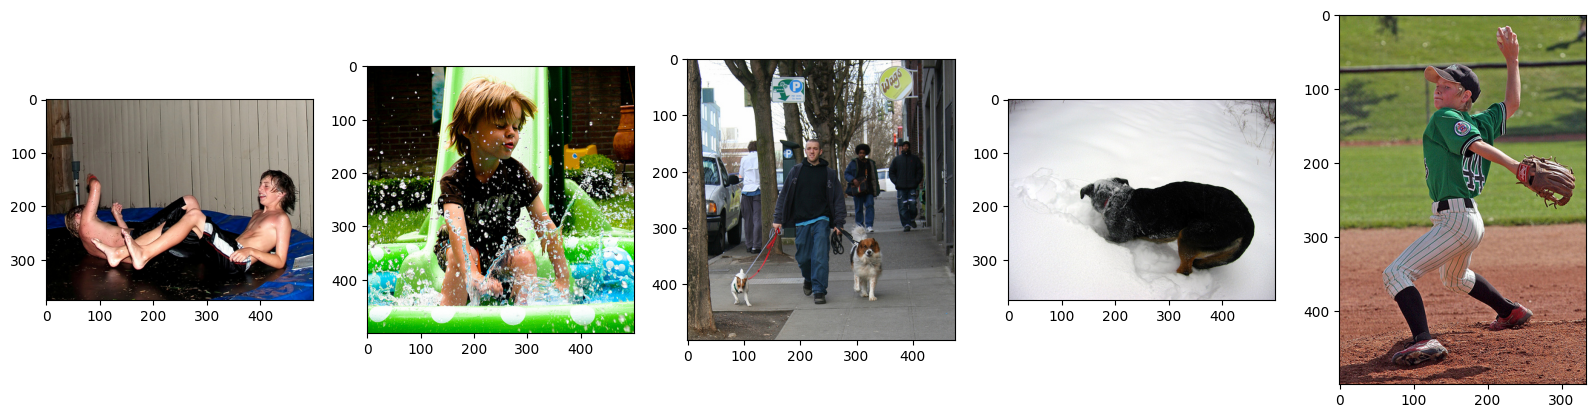

In [3]:
#Visualising first 5 images:

Display_Images= all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)

for ax,image in zip(axes, Display_Images):
    ax.imshow(io.imread(image), cmap=None)

 **1.3. Create word-to-index and index-to-word mappings**

 We will now load the content of a text file and then demonstrates its use by loading the text from the specified file and displaying the first 300 characters as a test.

In [4]:
#Import the dataset and read the text file into a seperate variable

text_file = '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/captions.txt'

def load_doc(text_file):

    #your code here
    open_file = open(text_file, 'r', encoding="latin-1") #associate and returns a file object
    text = open_file.read() #for reading the content of the file
    print(text)
    open_file.close()
    return text

doc = load_doc(text_file)
print(doc[:300])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**1.4. Create a dataframe which summarizes the image, path & captions as a dataframe**

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [5]:
all_imgs

['/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/3736786640_70df13be2c.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/3758175529_81941e7cc9.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/397547349_1fd14b95af.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/391723162_3bdeb7ea33.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/3744832122_2f4febdff6.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/3727752439_907795603b.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/397286183_745abbf40d.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/392467282_00bb22e201.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Imag

We are now process the contents of a text file ('Flickr8K/captions.txt') to create a DataFrame (df) that contains image IDs, image paths, and captions.

In [6]:
image_path='/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/'
all_img_id=[]  #store all the image id here
all_img_vector=[] #store all the image path here
annotations= []#store all the captions here

with open('/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/captions.txt', 'r') as fo:
    next(fo) # to skip the heading
    for line in fo:
        split_arr=line.split(',')
        all_img_id.append(split_arr[0])
        annotations.append(split_arr[1].rstrip('\n.')) #striping \n and fullstop
        all_img_vector.append(image_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions'])

df

ID  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450  997722733_0cb5439472.jpg    
40451  997722733_0cb5439472.jpg    
40452  997722733_0cb5439472.jpg    
40453  997722733_0cb5439472.jpg    
40454  997722733_0cb5439472.jpg    

                                                                                                                 Path  \
0      /content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg   
1      /content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg   
2      /content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg   
3      /content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg   
4      /content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg   
...                                                                                                               ...   
40450  /content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/997722733_0cb5439472.jpg    
40451  /content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/997722733_0cb5439472.jpg    
40452  /content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/997722733_0cb5439472.jpg    
40453  /content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/997722733_0cb5439472.jpg    
40454  /content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/997722733_0cb5439472.jpg    

                                                                         Captions  
0      A child in a pink dress is climbing up a set of stairs in an entry way      
1      A girl going into a wooden building                                         
2      A little girl climbing into a wooden playhouse                              
3      A little girl climbing the stairs to her playhouse                          
4      A little girl in a pink dress going into a wooden cabin                     
...                                                         ...                    
40450  A man in a pink shirt climbs a rock face                                    
40451  A man is rock climbing high in the air                                      
40452  A person in a red shirt climbing up a rock face covered in assist handles   
40453  A rock climber in a red shirt                                               
40454  A rock climber practices on a rock climbing wall                            

[40455 rows x 3 columns]

We now check and share the data type of the variable annotations with others. In this specific context, it helps us understand the nature of the data stored in the annotations variable.

In [7]:
type(annotations)

list

This step helps us understand the size or number of items in the annotations variable.

In [8]:
len(annotations)

40455

We then compile a list of all unique words found in the annotations variable. By using a list comprehension, we iterate through each caption, split it into words, and combine all words into a single list called vocabulary. This vocabulary list provides us with insight into the diversity of words used in our dataset, which is valuable for various natural language processing tasks within our project.

In [9]:
vocabulary = [word for line in annotations for word in line.split()]
vocabulary


['A',
 'child',
 'in',
 'a',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'a',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way',
 'A',
 'girl',
 'going',
 'into',
 'a',
 'wooden',
 'building',
 'A',
 'little',
 'girl',
 'climbing',
 'into',
 'a',
 'wooden',
 'playhouse',
 'A',
 'little',
 'girl',
 'climbing',
 'the',
 'stairs',
 'to',
 'her',
 'playhouse',
 'A',
 'little',
 'girl',
 'in',
 'a',
 'pink',
 'dress',
 'going',
 'into',
 'a',
 'wooden',
 'cabin',
 'A',
 'black',
 'dog',
 'and',
 'a',
 'spotted',
 'dog',
 'are',
 'fighting',
 'A',
 'black',
 'dog',
 'and',
 'a',
 'tri-colored',
 'dog',
 'playing',
 'with',
 'each',
 'other',
 'on',
 'the',
 'road',
 'A',
 'black',
 'dog',
 'and',
 'a',
 'white',
 'dog',
 'with',
 'brown',
 'spots',
 'are',
 'staring',
 'at',
 'each',
 'other',
 'in',
 'the',
 'street',
 'Two',
 'dogs',
 'of',
 'different',
 'breeds',
 'looking',
 'at',
 'each',
 'other',
 'on',
 'the',
 'road',
 'Two',
 'dogs',
 'on',
 'pavement',
 'moving',
 'towa

We can see that we had both A and a are counted separately. So,let's convert all words to lower case.

In [10]:
#Create the vocabulary & the counter for the captions

vocabulary = [word.lower() for line in annotations for word in line.split()]

val_count=collections.Counter(vocabulary)
val_count

Counter({'a': 60196,
         'child': 1507,
         'in': 18174,
         'pink': 702,
         'dress': 332,
         'is': 9069,
         'climbing': 490,
         'up': 1215,
         'set': 105,
         'of': 6495,
         'stairs': 109,
         'an': 2325,
         'entry': 1,
         'way': 48,
         'girl': 3277,
         'going': 145,
         'into': 1046,
         'wooden': 278,
         'building': 485,
         'little': 1736,
         'playhouse': 6,
         'the': 17507,
         'to': 3005,
         'her': 1102,
         'cabin': 4,
         'black': 3620,
         'dog': 7948,
         'and': 8057,
         'spotted': 36,
         'are': 3365,
         'fighting': 130,
         'tri-colored': 12,
         'playing': 1954,
         'with': 7304,
         'each': 399,
         'other': 667,
         'on': 10357,
         'road': 380,
         'white': 3706,
         'brown': 2457,
         'spots': 28,
         'staring': 57,
         'at': 2810,
         'stree

**1.5. Visualise the top 30 occuring words in the captions**

a :  60196
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457
an :  2325
his :  2255
blue :  2125
dogs :  2095
running :  1996


Text(0, 0.5, 'Counts')

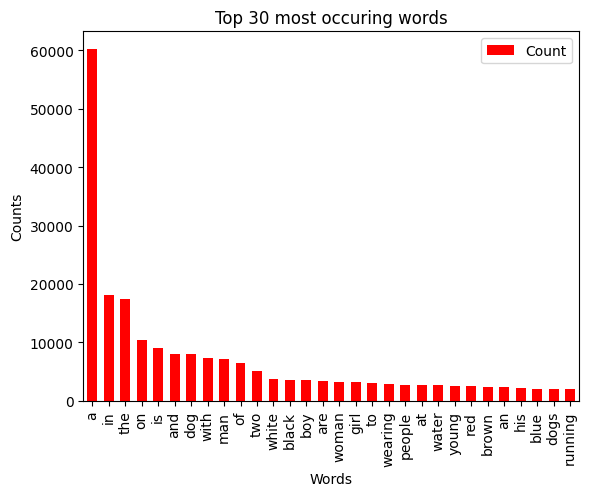

In [11]:
for word, count in val_count.most_common(30):
    print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word',y='Count',width=0.6,color='red')
plt.title("Top 30 most occuring words")
plt.xlabel("Words")
plt.ylabel("Counts")

 Let's create a word cloud visualization to represent the frequency of words in our dataset. This step provides a more visually engaging way to understand the prominence of words in our captions.

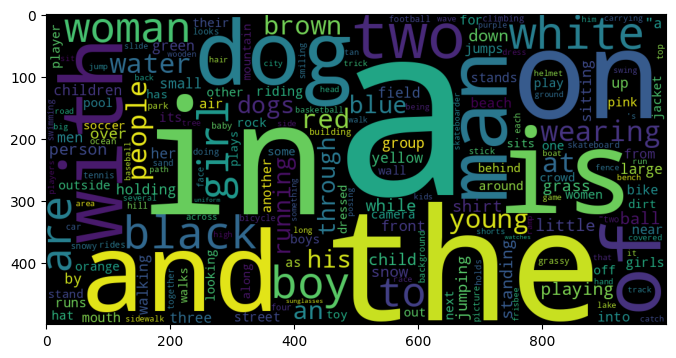

In [12]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)

We can see that stopwords are having higher frequency. Let's find top 30 commom words excluding them.

dog :  7948
man :  7137
two :  5132
white :  3706
black :  3620
boy :  3514
woman :  3304
girl :  3277
wearing :  2916
people :  2811
water :  2676
young :  2587
red :  2553
brown :  2457
blue :  2125
dogs :  2095
running :  1996
playing :  1954
little :  1736
shirt :  1735
standing :  1702
ball :  1678
grass :  1565
person :  1515
child :  1507
snow :  1439
jumping :  1430
front :  1322
sitting :  1322
small :  1257


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'dog'),
  Text(1, 0, 'man'),
  Text(2, 0, 'two'),
  Text(3, 0, 'white'),
  Text(4, 0, 'black'),
  Text(5, 0, 'boy'),
  Text(6, 0, 'woman'),
  Text(7, 0, 'girl'),
  Text(8, 0, 'wearing'),
  Text(9, 0, 'people'),
  Text(10, 0, 'water'),
  Text(11, 0, 'young'),
  Text(12, 0, 'red'),
  Text(13, 0, 'brown'),
  Text(14, 0, 'blue'),
  Text(15, 0, 'dogs'),
  Text(16, 0, 'running'),
  Text(17, 0, 'playing'),
  Text(18, 0, 'little'),
  Text(19, 0, 'shirt'),
  Text(20, 0, 'standing'),
  Text(21, 0, 'ball'),
  Text(22, 0, 'grass'),
  Text(23, 0, 'person'),
  Text(24, 0, 'child'),
  Text(25, 0, 'snow'),
  Text(26, 0, 'jumping'),
  Text(27, 0, 'front'),
  Text(28, 0, 'sitting'),
  Text(29, 0, 'small')])

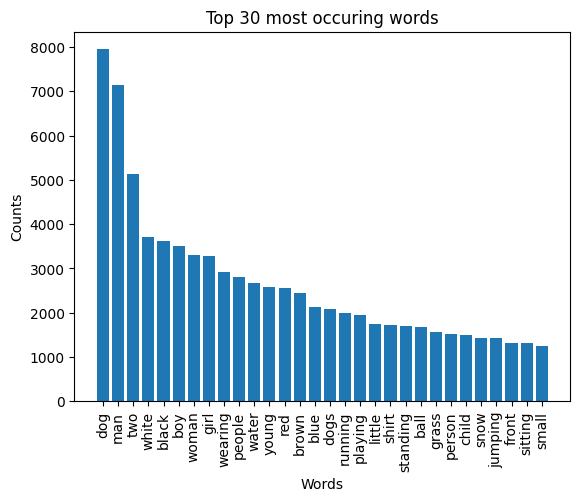

In [13]:
for word, count in val_count.most_common(47):
    if word not in STOPWORDS:
        print(word, ": ", count)

dict_without_stopwords = {}
for word, count in val_count.most_common(47):
    if word not in STOPWORDS:
        dict_without_stopwords[word] = count


#plt.bar(*zip(*dict_without_stopwords.items()))
#plt.show()
plt.bar(range(len(dict_without_stopwords)), dict_without_stopwords.values(), align='center')
plt.xticks(range(len(dict_without_stopwords)), list(dict_without_stopwords.keys()))
plt.title("Top 30 most occuring words")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=90)



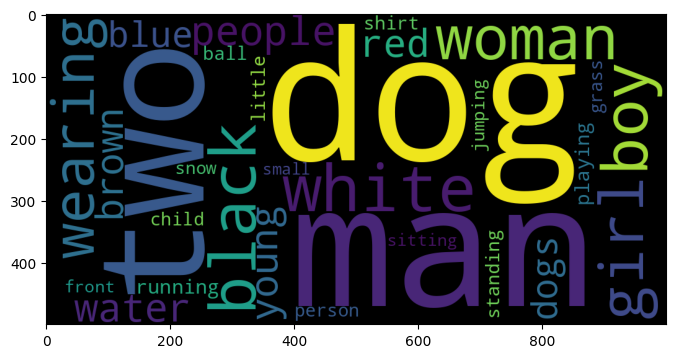

In [14]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(dict_without_stopwords)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)

We will collectively performe analysis and visualization related to the word count in our captions. This step helps us understand the distribution of caption lengths in our dataset and determine the mean word count.

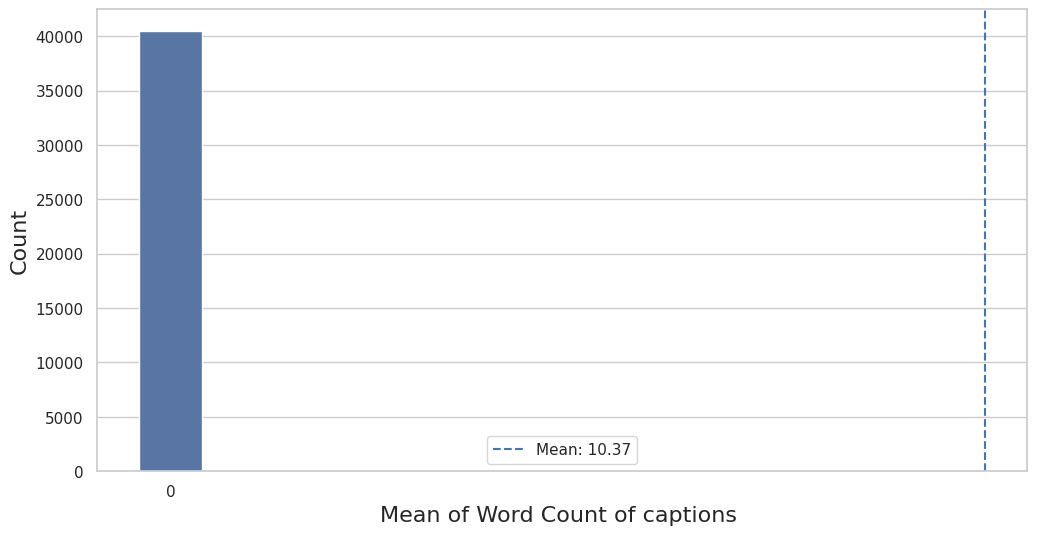

In [15]:
caption_df=df.copy()
caption_df['caption_word_count'] = caption_df["Captions"].str.split().str.len()

mean = sum(caption_df['caption_word_count'])/len(caption_df['caption_word_count'])

sns.set(style="whitegrid", font_scale = 1)
plt.figure(figsize=(12, 6))
ax = sns.countplot(caption_df['caption_word_count'], color="b")
plt.xlabel('Mean of Word Count of captions ', fontsize=16)
plt.ylabel('Count', fontsize=16)
ax.axvline(mean, color='b', linestyle='--')
plt.legend({'Mean: {:.2f}'.format(mean): mean})

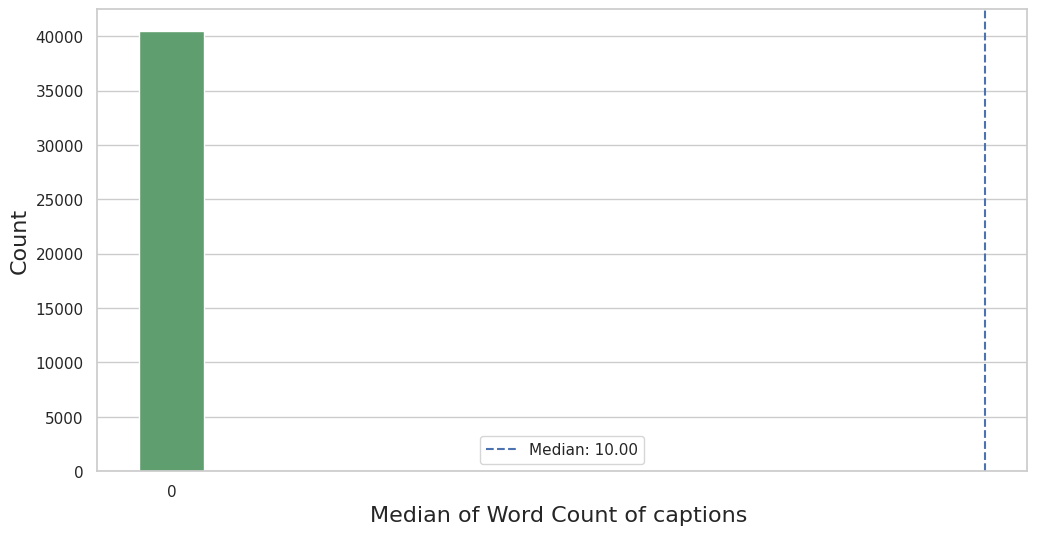

In [16]:
mean = np.median(caption_df['caption_word_count'])

sns.set(style="whitegrid", font_scale = 1)
plt.figure(figsize=(12, 6))
ax = sns.countplot(caption_df['caption_word_count'], color="g")
plt.xlabel('Median of Word Count of captions ', fontsize=16)
plt.ylabel('Count', fontsize=16)
ax.axvline(mean, color='b', linestyle='--')
plt.legend({'Median: {:.2f}'.format(mean): mean})

We can see that most of the captions have about 10 words.

**1.6. Create a list which contains all the captions & path**

Until now we visualized the images and captions separately. Now let's visualize both of them together.


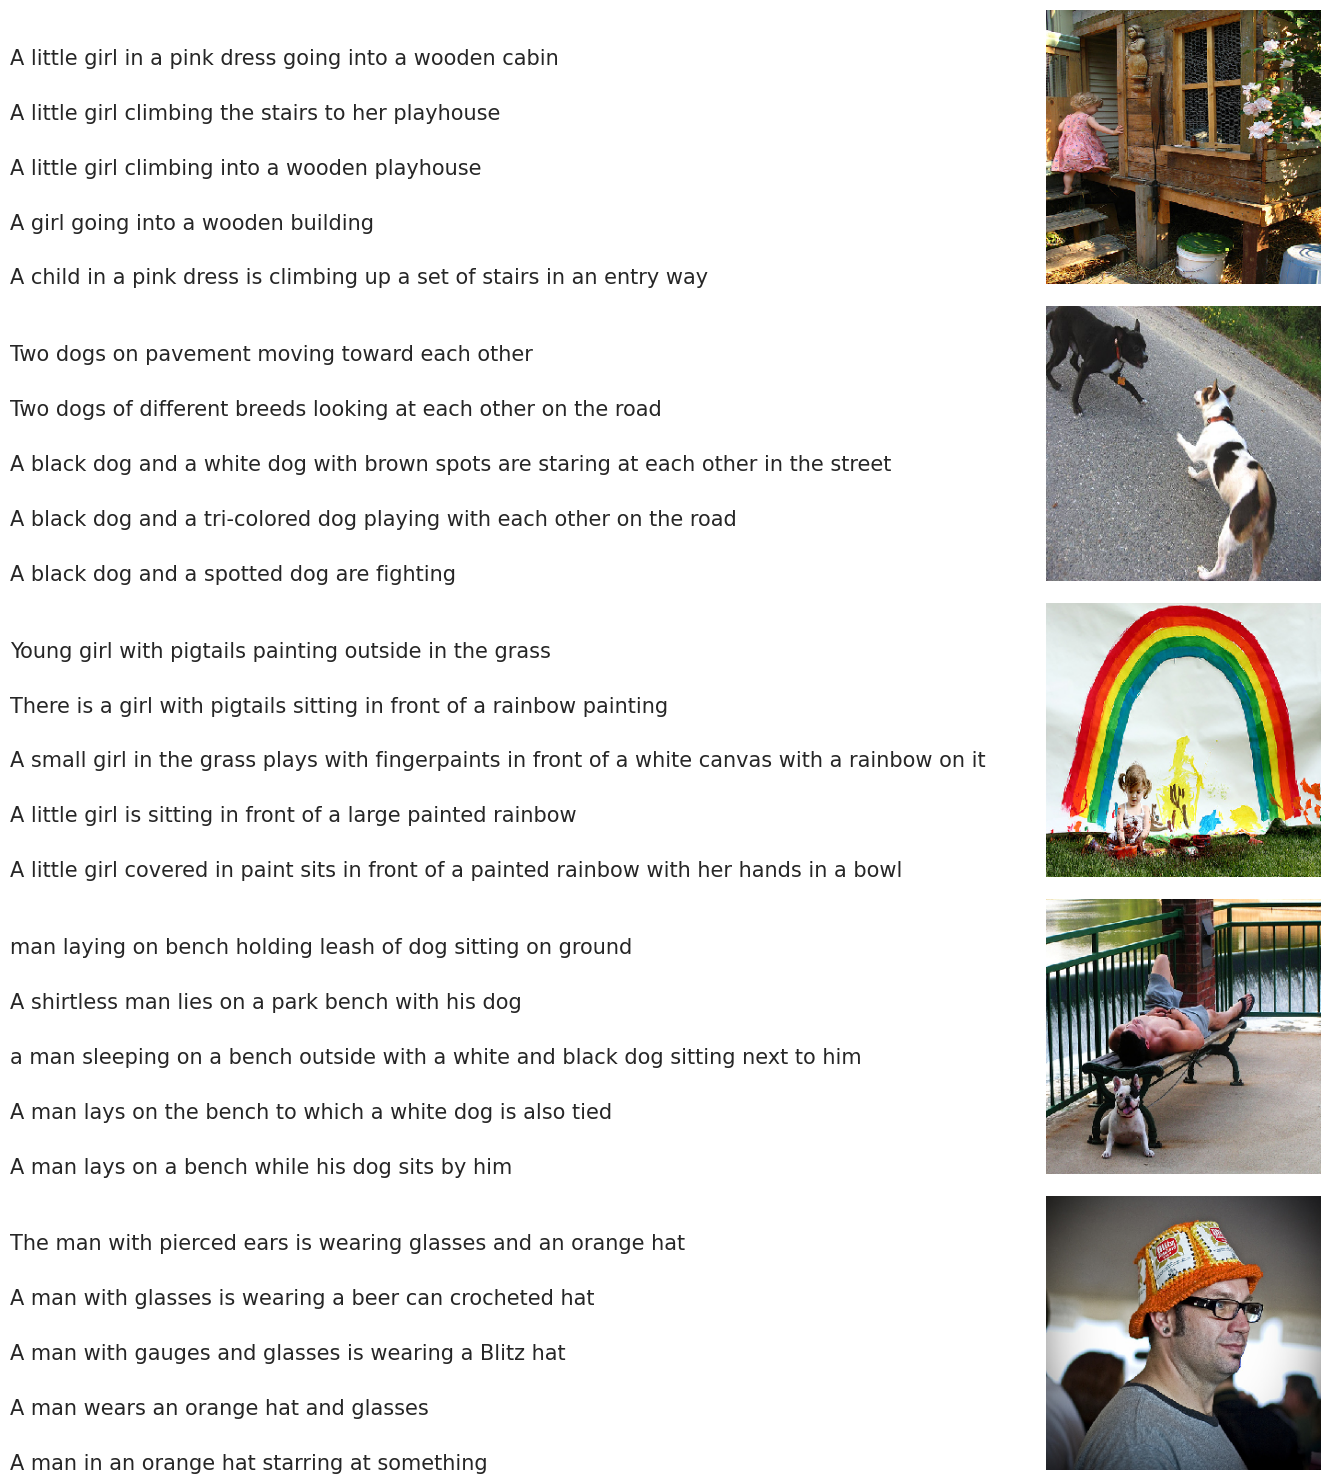

In [17]:
fig = plt.figure(figsize=(15,15)) # For dosplaying image
count = 1

for Path in df[:25].Path.unique(): # Loading 1st 25 paths which will have 5 distinct images
    captions = list(df["Captions"].loc[df.Path== Path].values)
    display_image = load_img(Path,target_size=(299,299,3))
    ax = fig.add_subplot(5,2,count) #Adding a subplot that spans 5 rows:
    plt.axis('off')  # we don't want both x and y axes for caption
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions)) #to decide the spacing between each line of caption
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=15)  #to display the captions
    count+=1
    plt.tight_layout() #to make sure that image and caption don't overlap

    ax = fig.add_subplot(5,2,count)
    ax.imshow(display_image)
    plt.axis('off')
    count +=1

plt.show()

## **II. Data Cleaning**

- Converting all words to lower case
- Removing punctuations
- Retaining only words by removing numbers
- Removing hanging s, a or any one letter word

In [18]:
remove_punctuation = str.maketrans('', '', string.punctuation)
for i in range(len(annotations)):
    line = annotations[i]
    line = line.split()
    line = [word.lower() for word in line] # convert to lower case
    line = [word.translate(remove_punctuation) for word in line]# remove punctuation from each token
    line = [word for word in line if len(word)>1] # remove hanging 's' and 'a'
    line = [word for word in line if word.isalpha()]# remove tokens with numbers in them
    annotations[i]=  ' '.join(line)   # store as string

In this code section, we prepare our data for an image captioning project. We add `<start>` and `<end>` tokens to each caption and store them in the `annotations` list. Additionally, we create a list called `all_img_path` containing image paths, and we print the total counts of captions and images in our dataset for verification purposes.

In [19]:
#Create a list which contains all the captions

#add the <start> & <end> token to all those captions as well
annotations=['<start>' + ' ' +  line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path= all_img_vector#write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


In [20]:
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

**2.1. Pre-Processing the captions**

1. Create the tokenizer

2. Replace all other words with the unknown token "UNK"

3. Create word-to-index and index-to-word mappings

4. Pad all sequences to be the same length as the longest one

Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

- Let's remove punctuations using filter again for to be sure (The default is all punctuation, plus tabs and line breaks, minus the ' character.)
- Convert words to lower case (this is also already done.Let's do again to be safe)
- Replace out-of-vocabulary words with UNK token and assign PAD token for reseved zero index

In [21]:
top_voc = 5000
tokenizer =Tokenizer(num_words=top_voc+1,filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',
                                                  lower=True, char_level=False,
                                                  oov_token="UNK")

# Create word-to-index and index-to-word mappings.

tokenizer.fit_on_texts(annotations) #Updates internal vocabulary based on a list of texts.

train_seqs = tokenizer.texts_to_sequences(annotations)#Transforms each text in texts to a sequence of integers.

# when we use the pad_sequence to process the sequence, we will be using 0 as the padding value.
# In order to distinguish between PAD and UNKNOWN, keras use different index for UNKNOWN.

# 0 is a reserved index that won't be assigned to any word.Let's add PAD token for zero

tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'


In [22]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])


UNK
PAD


In [23]:
tokenizer.index_word

{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'in',
 5: 'the',
 6: 'on',
 7: 'is',
 8: 'and',
 9: 'dog',
 10: 'with',
 11: 'man',
 12: 'of',
 13: 'two',
 14: 'white',
 15: 'black',
 16: 'boy',
 17: 'are',
 18: 'woman',
 19: 'girl',
 20: 'to',
 21: 'wearing',
 22: 'people',
 23: 'at',
 24: 'water',
 25: 'young',
 26: 'red',
 27: 'brown',
 28: 'an',
 29: 'his',
 30: 'blue',
 31: 'dogs',
 32: 'running',
 33: 'through',
 34: 'playing',
 35: 'while',
 36: 'down',
 37: 'little',
 38: 'shirt',
 39: 'standing',
 40: 'ball',
 41: 'grass',
 42: 'person',
 43: 'child',
 44: 'snow',
 45: 'jumping',
 46: 'over',
 47: 'three',
 48: 'front',
 49: 'sitting',
 50: 'small',
 51: 'field',
 52: 'up',
 53: 'holding',
 54: 'large',
 55: 'group',
 56: 'by',
 57: 'green',
 58: 'yellow',
 59: 'children',
 60: 'walking',
 61: 'men',
 62: 'her',
 63: 'into',
 64: 'beach',
 65: 'air',
 66: 'near',
 67: 'jumps',
 68: 'mouth',
 69: 'street',
 70: 'runs',
 71: 'for',
 72: 'another',
 73: 'riding',
 74: 'from',
 75: 'it

In [24]:
tokenizer.word_counts

OrderedDict([('<start>', 40455),
             ('child', 1517),
             ('in', 18182),
             ('pink', 702),
             ('dress', 332),
             ('is', 9069),
             ('climbing', 490),
             ('up', 1215),
             ('set', 105),
             ('of', 6496),
             ('stairs', 109),
             ('an', 2358),
             ('entry', 1),
             ('way', 48),
             ('<end>', 40455),
             ('girl', 3284),
             ('going', 145),
             ('into', 1046),
             ('wooden', 278),
             ('building', 485),
             ('little', 1750),
             ('playhouse', 6),
             ('the', 17676),
             ('to', 3005),
             ('her', 1102),
             ('cabin', 4),
             ('black', 3627),
             ('dog', 7956),
             ('and', 8057),
             ('spotted', 36),
             ('are', 3365),
             ('fighting', 130),
             ('tricolored', 12),
             ('playing', 1954),
        

In [25]:
annotations[:5]


['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

In [26]:
train_seqs[:5]

[[2, 43, 4, 88, 169, 7, 115, 52, 390, 12, 382, 4, 28, 1, 687, 3],
 [2, 19, 309, 63, 193, 119, 3],
 [2, 37, 19, 115, 63, 193, 2354, 3],
 [2, 37, 19, 115, 5, 382, 20, 62, 2354, 3],
 [2, 37, 19, 4, 88, 169, 309, 63, 193, 2889, 3]]

In [27]:
print(len(train_seqs))
print(type(train_seqs))

40455
<class 'list'>


<start> :  40455
<end> :  40455
in :  18182
the :  17676
on :  10367
is :  9069
and :  8057
dog :  7956
with :  7308
man :  7164
of :  6496
two :  5546
white :  3710
black :  3627
boy :  3534
are :  3365
woman :  3320
girl :  3284
to :  3005
wearing :  2917
people :  2837
at :  2819
water :  2676
young :  2610
red :  2553
brown :  2471
an :  2358
his :  2255
blue :  2125
dogs :  2097


Text(0, 0.5, 'Counts')

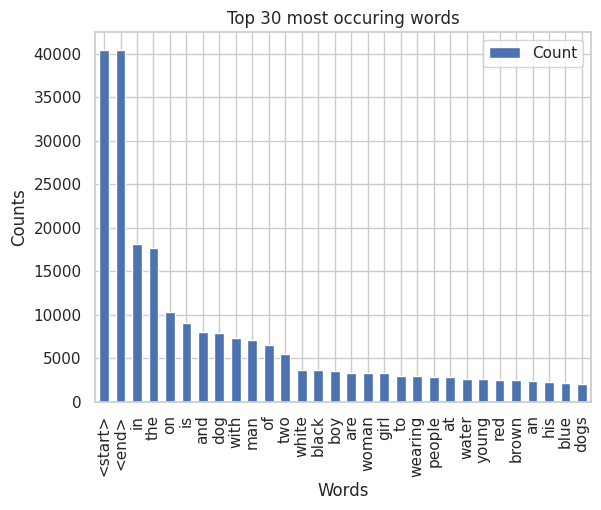

In [28]:
# Create a word count of tokenizer to visulize the Top 30 occuring words after text processing

tokenizer_top_words= [word for line in annotations for word in line.split()]

tokenizer_top_words_count=collections.Counter(tokenizer_top_words)
tokenizer_top_words_count

for word, count in tokenizer_top_words_count.most_common(30):
    print(word, ": ", count)

token_lst = tokenizer_top_words_count.most_common(30)
most_common_words_df = pd.DataFrame(token_lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word',y='Count',width=0.6,color='b')
plt.title("Top 30 most occuring words")
plt.xlabel("Words")
plt.ylabel("Counts")

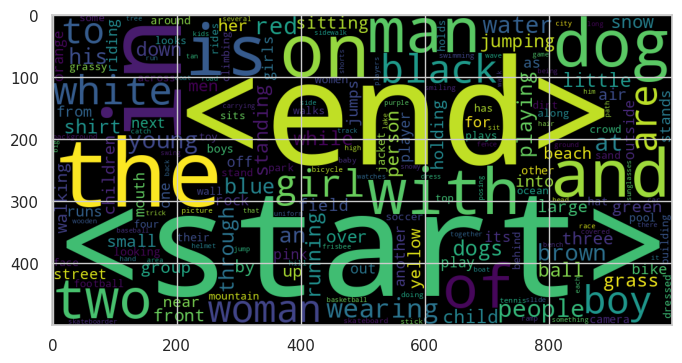

In [29]:
wordcloud_token = WordCloud(width = 1000,height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_token)

In [30]:
# Pad all sequences to be the same length as the longest one

train_seqs_len=[len(seq) for seq in train_seqs] # Storing all lengths in list
longest_word_length= max(train_seqs_len) # Python list method max returns the elements from the list with maximum value.

# Calculates the longest_word_length to pad all sequences to be the same length as the longest one.

cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post',maxlen=longest_word_length,
                                                          dtype='int32', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 31)


We apply padding at the end using the 'post' method. The start token serves as a prompt and expects a word to follow. However, when we add a zero at the beginning, it signifies the absence of a word. To maintain the existing sequence structure, we choose to pad at the end. However, this padding can pose challenges when creating an embedding vector, so we'll address it by applying a mask.

**2.2. Pre-processing the images**

1. Resize them into the shape of (299, 299)

3. Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3.

In [31]:
#checking to know about image format as we will be setting data format as none in tf.keras.applications.inception_v3.preprocess_input

tf.keras.backend.image_data_format()

'channels_last'

Image data format have default as 'channels_last' which indicates Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].

In [32]:
IMAGE_SHAPE= (299, 299)

In [33]:
#Let's see how preprocessed image looks by preprocessing first 5 images alone.
preprocessed_img=[]
for img in all_imgs[0:5]:
    img = tf.io.read_file(img,name=None)
    # by default channels=0 which indictaes to use the number of channels in the JPEG-encoded image.
    img = tf.image.decode_jpeg(img,channels=0) #Since its RGB images,we can give channels=3 also which will output an RGB image.
    img = tf.image.resize(img, IMAGE_SHAPE)
    img = tf.keras.applications.inception_v3.preprocess_input(img,data_format=None)#Default value for data format is None
    # It refers to global setting tf.keras.backend.image_data_format()
    preprocessed_img.append(img)

In this step, we are visualizing a set of preprocessed images.

Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)
Shape after resize : (299, 299, 3)


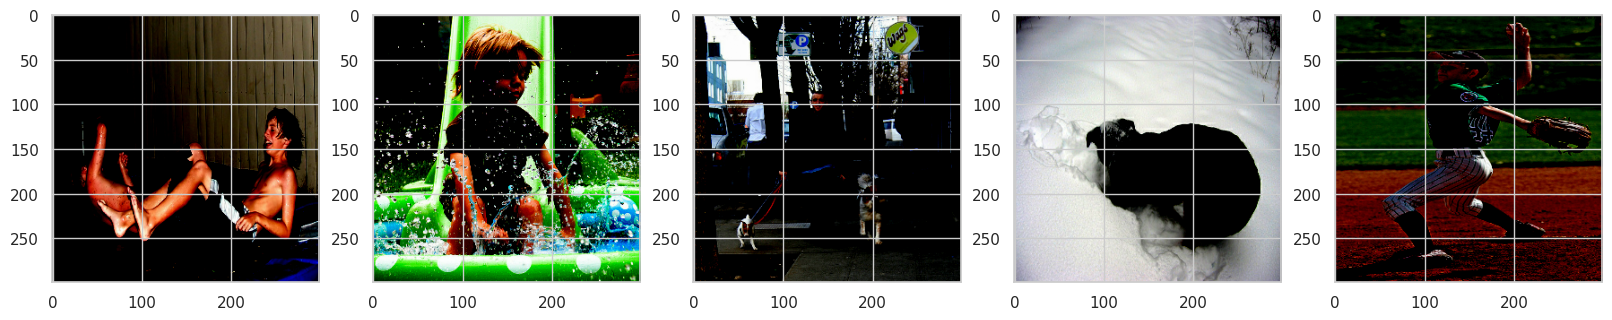

In [34]:
Display_Images= preprocessed_img[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)

for ax,image in zip(axes, Display_Images):
    print("Shape after resize :", image.shape)
    ax.imshow(image)
    ax.grid('off')

Let's write a function for preprocessing and return images and it's path so that we can
use concept of ***vectorization and preprocess images paralleley rather than writing for loop***.

In [35]:
def preprocess_images_function(image_path):

    img = tf.io.read_file(image_path,name=None)
    # by default channels=0 which indictaes to use the number of channels in the JPEG-encoded image.
    #Since its RGB images,we can give channels=3 also which will output an RGB image.
    img = tf.image.decode_jpeg(img,channels=0)
    img = tf.image.resize(img, IMAGE_SHAPE)
    img = tf.keras.applications.inception_v3.preprocess_input(img,data_format=None) #Default value for data format is None
    # It refers to global setting tf.keras.backend.image_data_format()
    return img, image_path

## **III. Create the train & test data**

1. Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2. Make sure you have done Shuffle and batch while building the dataset

3. The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4. The shape of each caption in the dataset after building should be(batch_size, max_len)

In [36]:
all_img_vector

['/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1001773457_577c3a7d70.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1001773457_577c3a7d70.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1001773457_577c3a7d70.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/

In [37]:
# mapping each image full path including name to the function to preprocess the image

# sorting and storing unique path in list which will be given as input
training_list = sorted(set(all_img_vector))

# Creating a Dataset using tf.data.Dataset. from_tensor_slice
New_Image_Data = tf.data.Dataset.from_tensor_slices(training_list)

# Mappng preprocess_images_function across the elements of the above dataset.
# num_parallel_calls= tf.data. AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
New_Image_Data = New_Image_Data.map(preprocess_images_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Keeping batch_size=64 (64 consecutive elements of this dataset is combined in a single batch).
# We don't want to drop the last batch if it contains element less than 64. So let's set drop_remainder=False
New_Image_Data= New_Image_Data.batch(64,drop_remainder=False)

In [38]:
New_Image_Data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [39]:
#sample_img_batch, sample_cap_batch = next(iter(New_Image_Data))
#print(sample_img_batch.shape) #(batch_size, 299, 299, 3)
#print(sample_cap_batch.shape) #(batch_size, max_len)

In [40]:
# performing the train-test spliit using 80-20 ratio & random state = 42

img_train_data, img_test_data, caption_train_data, caption_test_data = train_test_split(all_img_vector,cap_vector,test_size=0.2,random_state=42)

In [41]:
print("No of images in training dataset: ", len(img_train_data))
img_train_data[0:5]


No of images in training dataset:  32364


['/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/359082432_c1fd5aa2d6.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/2460799229_ce45a1d940.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/3634828052_3b6aeda7d6.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/2216568822_84c295c3b0.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/3080056515_3013830309.jpg']

In [42]:
print("No of images in testing dataset: ", len(img_test_data))
img_test_data[0:5]

No of images in testing dataset:  8091


['/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/2973269132_252bfd0160.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/270263570_3160f360d3.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/2053006423_6adf69ca67.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/512101751_05a6d93e19.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/3156406419_38fbd52007.jpg']

In [43]:
print("No of captions in training dataset: ", len(caption_train_data))
caption_train_data[0:5]

No of captions in training dataset:  32364


array([[   2,   11,    8,    9,   17,   39,    6,  146,  148,  110,  542,
          46,   20,    5,  170,    3,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,    5,   47,   95,  238,   17,   21,  472,  543,   17,   90,
          63,    5,   24,    3,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   18,   10,   94,   10,  283,  195, 2640,  278,  140,    3,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   18,   10,   26, 2236,  168,    8, 1869,  455, 1056,    6,
          62,  325,    3,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   80,   42,    7, 3255,   20,   72,    3,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        

In [44]:
print("No of captions in testing dataset: ", len(caption_test_data))
caption_test_data[0:5]

No of captions in testing dataset:  8091


array([[   2,   54, 1626,  588,    7, 4556,  223,  121, 1476,    3,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   13,   27,   31,  500,    6,    5, 1681,  170,    3,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   11,    4,  164,    7,   39,    6,   82,   90,   87,   23,
           5,  458,   74,    5, 3975,    3,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,  887,   14,    9,    7,   32,    6,    5,   41,    3,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   42,  376,  727,    3,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        

**Load the pretrained Imagenet weights of Inception net V3**

1. To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2. The shape of the output of this layer is 8x8x2048.

3. Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



*Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset. So let's also use same model to get feature vector.*

In [45]:
image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

new_input = image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output #write code here to get the output of the image_model

#image_features_extract_model = keras.Model(new_input, hidden_layer) #build the final model using both input & output layer
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)  #build the final model using both input & output layer


87910968/87910968 [==============================] - 1s 0us/step


In [46]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

In this context, our goal is not image classification; instead, we are focused solely on extracting image vectors. As a result, we are excluding the softmax layer from the model.

In [47]:
# Extract features from each image in the dataset
image_features_dict={}
for image, image_path in tqdm(New_Image_Data): #using tqdm as progress bar
    features_for_batch = image_features_extract_model(image) #feeding images from above created dataset to Inception v3 which we build above
    #fb_shape = features_for_batch.get_shape().as_list()
    #features_for_batch_flattened = tf.contrib.layers.flatten(fb_shape)
    features_for_batch_flattened = tf.reshape(features_for_batch,
                             (features_for_batch.shape[0], -1, features_for_batch.shape[3])) ##We are sqeezing/squashing

    for batch_feat, path in zip(features_for_batch_flattened, image_path):
        feature_path = path.numpy().decode("utf-8")
        image_features_dict[feature_path] =  batch_feat.numpy()

100%|██████████| 127/127 [26:22<00:00, 12.46s/it]


In [48]:
features_for_batch

<tf.Tensor: shape=(27, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 7.74662197e-02, 0.00000000e+00, ...,
          2.31837645e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.07787728e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.94033504e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.85754776e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.42662954e-02, 0.00000000e+00, 5.05790830e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 4.23005670e-01, 1.34464502e-02, ...,
          2.33669966e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [49]:
features_for_batch_flattened

<tf.Tensor: shape=(27, 64, 2048), dtype=float32, numpy=
array([[[0.0000000e+00, 7.7466220e-02, 0.0000000e+00, ...,
         2.3183765e-01, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.0778773e-01, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 1.9403350e-01, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 1.8575478e-01],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 1.6569382e+00, 0.0000000e+00],
        [0.0000000e+00, 4.0261045e-01, 0.0000000e+00, ...,
         0.0000000e+00, 3.1791970e-01, 0.0000000e+00],
        [0.0000000e+00, 2.5347557e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.2506015e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 7.8496963e-02, ...,
         1.2064192e+00, 0.0000000e+00, 0.0000000e+00],
        [0.000000

In [50]:
len(image_features_dict)

8091

In [51]:
batch_feat.shape

TensorShape([64, 2048])

In [52]:
# Printing first 5 elememts have dictionary:

import more_itertools
top_5_items = more_itertools.take(5, image_features_dict.items())
top_5_items

[('/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1000268201_693b08cb0e.jpg',
  array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.16987033],
         [0.        , 0.        , 1.0105923 , ..., 0.        , 0.        ,
          0.06111681],
         ...,
         [0.        , 0.        , 2.038045  , ..., 1.2029712 , 0.        ,
          1.992414  ],
         [0.        , 0.        , 0.9046917 , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 1.2527282 , 0.        , ..., 0.        , 0.        ,
          0.        ]], dtype=float32)),
 ('/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/Images/1001773457_577c3a7d70.jpg',
  array([[0.        , 0.6636802 , 0.46286002, ..., 0.        , 0.        ,
          3.3322637 ],
         [0.        , 1.226817  , 0.        , ...,

In [53]:
# Give both images and caption to model as input
def model_input(image,captions):
    image_final = image_features_dict[image.decode('utf-8')]
    return image_final,captions

In the next step, we define a data generator function for creating a TensorFlow dataset to facilitate model training. The `BUFFER_SIZE` parameter controls shuffling, ensuring elements are shuffled within a buffer of 1000 elements. The `BATCH_SIZE` is set to 64, meaning 64 consecutive elements are grouped into a batch. The function also includes data mapping, shuffling, batching, and prefetching operations, optimizing the data pipeline for efficient training.

In [54]:
# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 1000

# Batch size
BATCH_SIZE = 64 ##tried with different batch sizes.kernal is dieing for 32 .So finally fixed 64.

def data_generator(images_data, captions_data):

    # Creating a Dataset using tf.data.Dataset.from_tensor_slice
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))

    # num_parallel_calls= tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available CPU.
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(model_input, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # reshuffle_each_iteration=True indicate Shuffle order should be different for each epoch.
    # Keeping batch_size=64 (64 consecutive elements of this dataset is combined in a single batch).
    # We don't want to drop the last batch if it contains element less than 64.So let's set drop_remainder=False
    # Prefetch function is used to prepare later elements while the current element is being processed.

    dataset = (
     dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=True)
    .batch(BATCH_SIZE, drop_remainder=False)
    .prefetch(tf.data.experimental.AUTOTUNE)
    )

    return dataset

In [55]:
train_dataset=data_generator(img_train_data,caption_train_data)
test_dataset=data_generator(img_test_data,caption_test_data)

In [56]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(64, 64, 2048)
(64, 31)


## **IV. Model Building**

**4.1. Set the parameters**

In [57]:
embedding_dim = 256
units = 512
vocab_size = 5001 #top 5,000 words +1
train_num_steps = len(img_train_data) // BATCH_SIZE  #len(total train images) // BATCH_SIZE
test_num_steps = len(img_test_data) // BATCH_SIZE   #len(total test images) // BATCH_SIZE
max_length=31
features_shape = batch_feat.shape[1]
attention_features_shape = batch_feat.shape[0]

**4.2. Build the Encoder, Attention model & Decoder**

##### **4.2.1. Encoder**

In [58]:
tf.compat.v1.reset_default_graph() #to resolve compatibility issue

In [59]:
print(tf.compat.v1.get_default_graph())


PyGraph<140640183691888>


In [60]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        #It acts as the fully connected layer

    def call(self, features):
        features = self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0) #applying relu activation
        return features

In [61]:
encoder=Encoder(embedding_dim)

##### **4.2.2. Attention model**

In [62]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 =  tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis=hidden[:, tf.newaxis] # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score =tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))# build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.keras.activations.softmax(self.V(score), axis=1)# extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)# reduce the shape to (batch_size, embedding_dim)
        # the tensor is reduced along the second dimension (columns)

        return context_vector, attention_weights

The attention model carries out a linear transformation of the input data, and we subsequently apply the tanh function to it. This step is essential for introducing non-linearity and obtaining a smooth output. To achieve attention scores, we use the features from the dense layer of the encoder and the hidden state of the decoder as inputs to the tanh function.

In simpler terms, the tanh function introduces non-linear transformations and ensures a smooth output. Since we require the output to be within the range of (0,1), we employ the softmax function on the resulting attention scores, which then provides us with the attention weights.

In the end, we calculate a weighted sum of these attention weights on the feature vector, resulting in our context vector. It's important to note that these context vectors are adaptive and change for each timestamp, allowing our model to focus on different parts of the input sequence as needed.

##### **4.2.3. Decoder**

In [63]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)#iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim)#build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size)   #build your Dense layer

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)#create your context vector & attention weights from attention model
        embed = self.embed(x)# embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1)# Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)

        return output,state, attention_weights

    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In our process, we understand that the encoder's output, along with the hidden state, is forwarded to the attention model. This attention model generates a context vector. This context vector is then combined with the embedded vector created from the embedding layer and sent to the GRU layer. Afterward, the GRU's output is passed through dense layers, ultimately aiming to produce an output with a shape corresponding to the vocabulary size. This is necessary as we intend to assign probabilities to every word within our vocabulary.

In [64]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [65]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


## **V. Model training & optimization**

**5.1. Set the optimizer & loss object**

In [66]:
optimizer =tf.keras.optimizers.Adam(lr=0.001) #define the optimizer
loss_object =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                            reduction=tf.keras.losses.Reduction.NONE) #define your loss object
#we always need to choose appropriate loss function.Let us use crossentropy SparseCategoricalCrossentropy.
# It calculates loss between the labels and predictions.

In [67]:
# zero is causing discrepency. We dont want decoder to give importance to zero.so lets mask zero to false

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask # we are multiplying loss with mask to get ideal shape

    return tf.reduce_mean(loss_)

**5.2. Create your checkpoint path**

In [68]:
#path='https://upgrad.nimblebox.ai/project/upg-aruna-4881-21712/tree?/checkpoint'
#os.mkdir(path)

checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Capstone - Eye for the Blind/Flickr8K/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [69]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])


**5.3. Create your training & testing step functions**

In [70]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    #hidden = decoder.reset_state(batch_size=target.shape[0]) #we dont have reset_state method
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape: #Record operations for automatic differentiation for implementing backpropagation
        #write your code here to do the training steps
        encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder
        for t in range(1, target.shape[1]):
          # passing encoder_output to the decoder
          predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

          loss += loss_function(target[:, t], predictions)

          dec_input = tf.expand_dims(target[:, t], 1)

    avg_loss = (loss / int(target.shape[1])) #we are calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables

    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables))

    return loss, avg_loss

In [71]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    #hidden = decoder.reset_state(batch_size=target.shape[0]) #we dont have reset_state method
    hidden = decoder.init_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape: #Record operations for automatic differentiation.
        #write your code here to do the training steps
        encoder_output = encoder(img_tensor)

        # Using the teacher forcing technique where the target word is passed as the next input to the decoder.
        for t in range(1, target.shape[1]):
          # passing encoder_output to the decoder
          predictions, hidden, _ = decoder(dec_input, encoder_output, hidden)

          loss += loss_function(target[:, t], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, t], 1)

    avg_loss = (loss / int(target.shape[1]))#we are calculating average loss for every batch

    tot_trainables_variables = encoder.trainable_variables + decoder.trainable_variables

    grads = tape.gradient(loss, tot_trainables_variables) # to calculate gradients with respect to every trainable variable

    #compute gradients and apply it to the optimizer and backpropagate.
    optimizer.apply_gradients(zip(grads, tot_trainables_variables))

    return loss, avg_loss

We implement teacher forcing during training as it accelerates convergence. Additionally, during the initial training stages, the model's predictions can be quite inaccurate. Without teacher forcing, incorrect predictions early on can lead to a cascade of errors, as the model's hidden states might be updated based on these inaccurate predictions. This can misguide the model's learning process and result in poor performance. Therefore, to ensure the model learns in the correct direction, we use teacher forcing, which involves supplying the target word as the next input to the decoder, helping the model make more accurate predictions during training.


**5.4. Create your loss function for the test dataset**

In [72]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data

    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
        avg_test_loss=total_loss / test_num_steps

    return avg_test_loss

In [73]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps

    loss_plot.append(avg_train_loss)
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)

    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 1.445, & test loss is 1.208
Time taken for 1 epoch 1703.513696193695 sec

Test loss has been reduced from 100.000 to 1.208


  7%|▋         | 1/15 [28:28<6:38:41, 1708.64s/it]

For epoch: 2, the train loss is 1.115, & test loss is 1.060
Time taken for 1 epoch 1605.403611421585 sec

Test loss has been reduced from 1.208 to 1.060


 13%|█▎        | 2/15 [55:20<5:57:53, 1651.82s/it]

For epoch: 3, the train loss is 1.008, & test loss is 0.973
Time taken for 1 epoch 1595.242567539215 sec

Test loss has been reduced from 1.060 to 0.973


 20%|██        | 3/15 [1:21:59<5:25:33, 1627.82s/it]

For epoch: 4, the train loss is 0.933, & test loss is 0.907
Time taken for 1 epoch 1596.5491065979004 sec

Test loss has been reduced from 0.973 to 0.907


 27%|██▋       | 4/15 [1:48:40<4:56:28, 1617.16s/it]

For epoch: 5, the train loss is 0.872, & test loss is 0.849
Time taken for 1 epoch 1606.8671550750732 sec

Test loss has been reduced from 0.907 to 0.849


 33%|███▎      | 5/15 [2:15:35<4:29:22, 1616.29s/it]

For epoch: 6, the train loss is 0.819, & test loss is 0.800
Time taken for 1 epoch 1585.241240978241 sec

Test loss has been reduced from 0.849 to 0.800


 40%|████      | 6/15 [2:42:05<4:01:07, 1607.51s/it]

For epoch: 7, the train loss is 0.771, & test loss is 0.753
Time taken for 1 epoch 1585.8602890968323 sec

Test loss has been reduced from 0.800 to 0.753


 47%|████▋     | 7/15 [3:08:37<3:33:36, 1602.12s/it]

For epoch: 8, the train loss is 0.726, & test loss is 0.710
Time taken for 1 epoch 1589.020891904831 sec

Test loss has been reduced from 0.753 to 0.710


 53%|█████▎    | 8/15 [3:35:09<3:06:33, 1599.02s/it]

For epoch: 9, the train loss is 0.685, & test loss is 0.670
Time taken for 1 epoch 1584.9693460464478 sec

Test loss has been reduced from 0.710 to 0.670


 60%|██████    | 9/15 [4:01:39<2:39:37, 1596.27s/it]

For epoch: 10, the train loss is 0.646, & test loss is 0.630
Time taken for 1 epoch 1579.8749823570251 sec

Test loss has been reduced from 0.670 to 0.630


 67%|██████▋   | 10/15 [4:28:04<2:12:43, 1592.70s/it]

For epoch: 11, the train loss is 0.611, & test loss is 0.597
Time taken for 1 epoch 1580.2054681777954 sec

Test loss has been reduced from 0.630 to 0.597


 73%|███████▎  | 11/15 [4:54:29<1:46:02, 1590.54s/it]

For epoch: 12, the train loss is 0.578, & test loss is 0.567
Time taken for 1 epoch 1584.1163170337677 sec

Test loss has been reduced from 0.597 to 0.567


 80%|████████  | 12/15 [5:20:59<1:19:30, 1590.14s/it]

For epoch: 13, the train loss is 0.548, & test loss is 0.534
Time taken for 1 epoch 1584.9368720054626 sec

Test loss has been reduced from 0.567 to 0.534


 87%|████████▋ | 13/15 [5:47:28<52:59, 1589.76s/it]  

For epoch: 14, the train loss is 0.521, & test loss is 0.508
Time taken for 1 epoch 1592.6219787597656 sec

Test loss has been reduced from 0.534 to 0.508


 93%|█████████▎| 14/15 [6:14:04<26:31, 1591.72s/it]

For epoch: 15, the train loss is 0.496, & test loss is 0.483
Time taken for 1 epoch 1590.7938544750214 sec

Test loss has been reduced from 0.508 to 0.483


100%|██████████| 15/15 [6:40:39<00:00, 1602.65s/it]


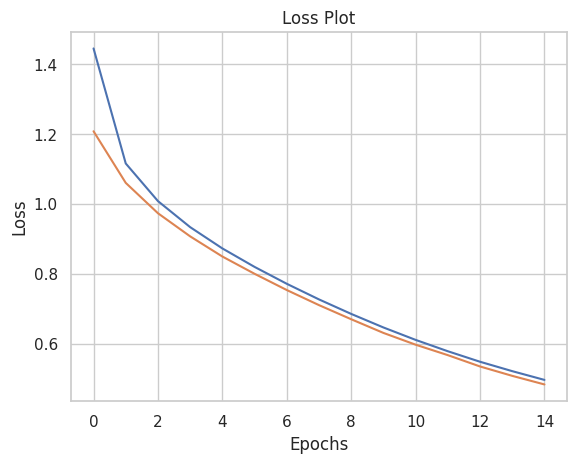

In [74]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.grid('off')
plt.show()


## **VI. Model Evaluation**

**6.1. Define your evaluation function using greedy search**

In [75]:
# Greedy Search

def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    #hidden = decoder.reset_state(batch_size=1)
    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(preprocess_images_function(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id =  tf.argmax(predictions[0]).numpy()#extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])#map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


In [76]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))

    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))

        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)

        img=ax.imshow(temp_img)

        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [77]:
from nltk.translate.bleu_score import sentence_bleu

In [78]:
def filt_text(text):
    filt=['<start>','<unk>','<end>']
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [79]:
img_test=img_test_data.copy()

**6.2. Test it on a sample data using BLEU score**

In [80]:
# Modifying the given code as function to run it several times by changing weights
def predicted_caption_audio(random,autoplay=False,weights=(0.5, 0.5, 0, 0)):

    cap_test=caption_test_data.copy()
    rid = np.random.randint(0, random)
    test_image = img_test[rid]
    #test_image = 'Flickr8K/Images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot,pred_test = evaluate(test_image)

    real_caption=filt_text(real_caption)

    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights)
    print(f"BELU score: {score*100}")

    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    plot_attmap(result, attention_plot, test_image)

    #Let's use Google Text to Speech Online API from playing the predicted caption as audio
    speech = gTTS("Predicted Caption is: "+ pred_caption,lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'
    #playsound('voice.wav')
    display.display(display.Audio(audio_file, rate=None,autoplay=autoplay))

    return test_image

BELU score: 78.41475134249411
Real Caption: muzzled white dog is running on the grass
Prediction Caption: white dog with muzzle is running on the grass


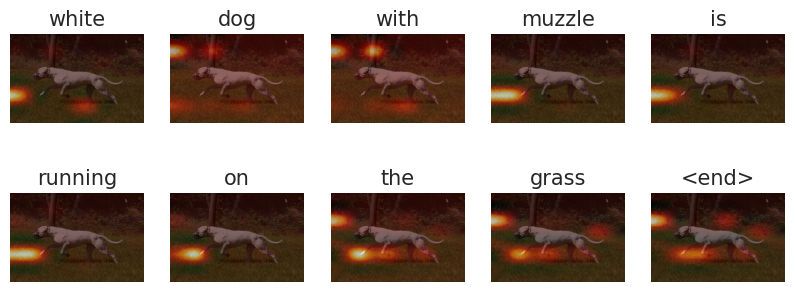

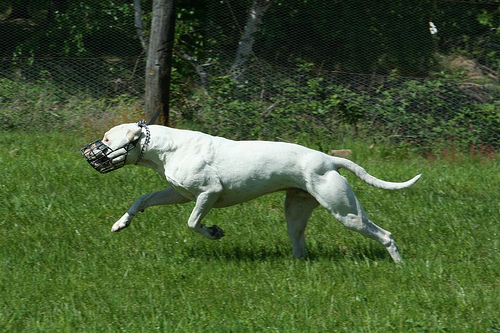

In [81]:
test_image=predicted_caption_audio(5,True,weights=(0.5,0.25,0,0))

Image.open(test_image)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score: 75.21206186172788
Real Caption: man walks through an arcade
Prediction Caption: man walks across an arcade


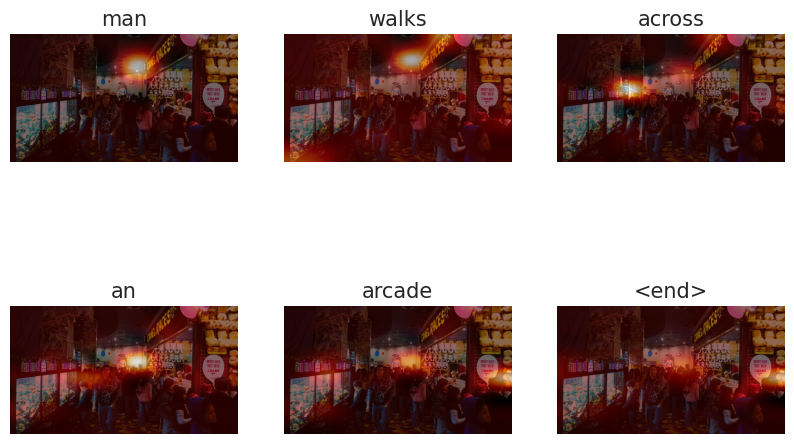

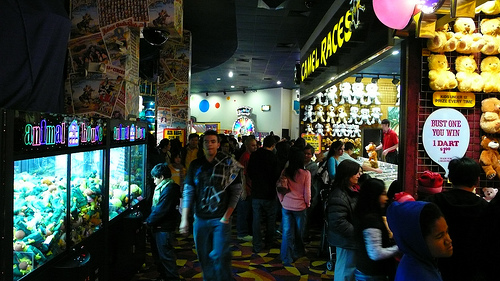

In [82]:
test_image=predicted_caption_audio(len(img_test),False,weights=(0.5,0.25,0,0))

Image.open(test_image)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score: 11.337974147240095
Real Caption: brown and black dog with red and white jacket run on road in rural area
Prediction Caption: black dog is running down path


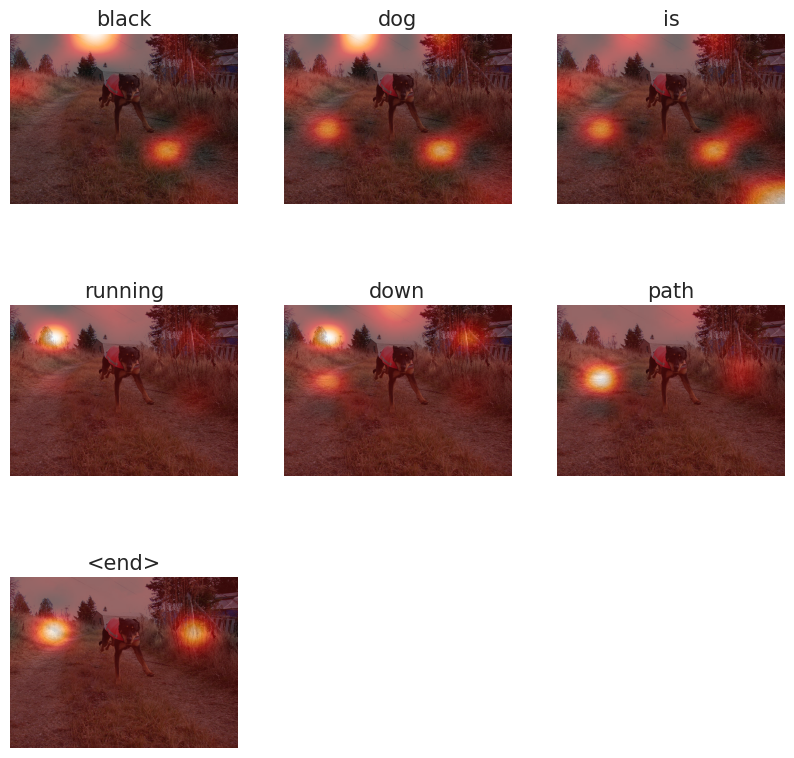

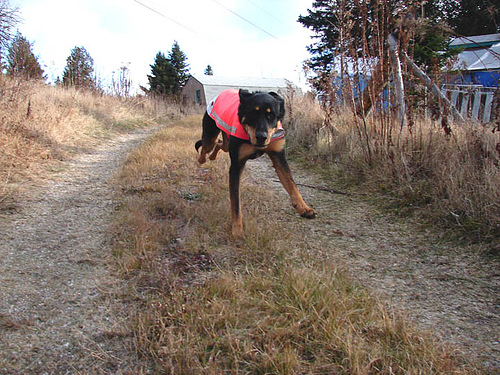

In [83]:
test_image1=predicted_caption_audio(len(img_test),False,weights=(0.25,0.25,0,0))

Image.open(test_image1)

BELU score: 0
Real Caption: children having pillow fight
Prediction Caption: group of kids have UNK


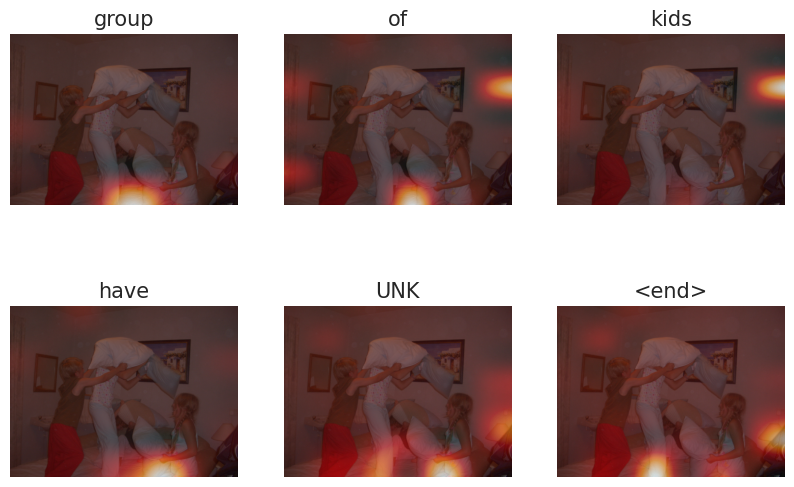

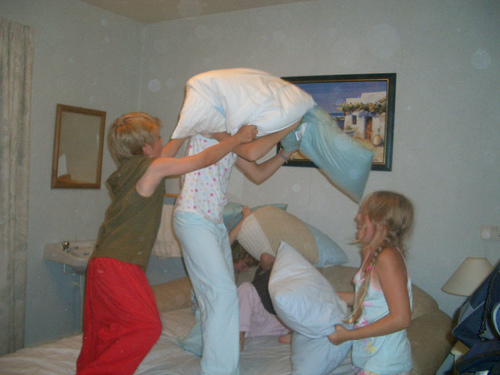

In [85]:
test_image=predicted_caption_audio(len(img_test),False,weights=(0.5,0.5,0,0))

Image.open(test_image)


### **VII. Summary:**

The project commenced by acquiring and displaying both images and their corresponding captions. An exploratory data analysis (EDA) was executed to gain insights into the provided dataset. The data underwent a cleaning process, which encompassed the refinement of the caption files.

Additionally, data preprocessing was conducted, involving the following tasks:
- Tokenizing the captions and creating embedded vectors.
- Preprocessing the images.

Subsequently, the dataset was partitioned into training and testing subsets. The InceptionV3 model was utilized, recognized for achieving a remarkable accuracy of over 78.1% on the ImageNet dataset. In this project, however, the objective was not image classification but the extraction of feature vectors from the images. Therefore, the softmax layer of the model was removed. The output from this layer originally possessed dimensions of 8x8x2048, which was then reshaped to (64, 2048).

This feature vector served as input to the CNN Encoder, which comprised a single fully connected layer. In an abstract sense, the encoder's output, an initialized hidden state, and the start token were combined and forwarded to the decoder.

The decoder, implemented as a recurrent neural network (RNN, specifically GRU), employed an attention mechanism to predict the next word. This attention mechanism directed the decoder's focus to specific regions of the image, enhancing accuracy and mitigating noise. The decoder generated the predicted caption and the decoder's hidden state as outputs, which were looped back into the model to calculate loss using "SparseCategoricalCrossentropy." Teacher forcing was utilized to determine the next input to the decoder.

The decoder ceased prediction when the model predicted the end token. The model's word predictions were established by assessing word probabilities within the vocabulary. The chosen approach was greedy search, which determined word probabilities based on their frequency in the vocabulary. This method sampled words, computed their probabilities, and selected the word with the highest probability.

Finally, the "BLEU score" (Bilingual Evaluation Understudy) was adopted as the evaluation metric for comparing predicted and actual captions, gauging the disparity between them.

-----------------------------------------------------------------------------------------------------------------------